In [4]:
#1. lectura de datos 
datos <- read.csv("Datos_Bart_C.csv",header=TRUE,sep=";",dec=",")
datos[1:10,]


id,student_id,year,total_credits_1,total_credits_2,total_courses_1,total_courses_2,course_approved_1,course_approved_2,course_failed_1,course_failed_2,t_gpa_1,t_gpa_2,c_gpa_1,c_gpa_2,start_year,Cluster,Permanencia_term_3
1,05cff88fd871c9e19bce4d8df60231,0,29,35,5,7,3,5,2,2,4.84,4.62,4.84,5.00,2017,3,1
2,080b659e7f6e033017ad4bda83b361,0,29,31,5,6,2,3,3,3,3.06,2.95,3.06,3.68,2017,1,1
3,0dee01f418108ad66efc4a0e0ec69d,0,29,31,5,7,5,7,0,0,6.35,6.11,6.35,6.23,2017,3,1
4,0fe5ab4f3df38493e8cc71afe37e45,0,29,31,5,6,2,1,3,5,3.59,2.37,3.59,3.25,2017,1,1
5,105b0c6e99b923e322c5f2a8b8cb72,0,29,26,5,5,2,0,3,5,2.61,1.06,2.61,2.99,2017,1,0
6,126848e7b46dc961068ec7e986589b,0,29,31,5,6,2,1,3,5,3.02,3.54,3.02,3.91,2017,1,0
7,1c3b9ea824f67a199286b9234015d3,0,29,31,5,7,5,5,0,2,5.37,4.71,5.37,5.03,2017,3,1
8,22413a4428da8a2c63278c18738cbe,0,29,35,5,7,3,7,2,0,3.98,4.72,3.98,4.87,2017,1,1
9,24f1adb1c9d34c3c26643e92fcc37a,0,29,28,5,6,4,5,1,1,4.82,4.52,4.82,4.83,2017,2,0
10,300b9980166ef23dce68bd095eadc6,0,29,35,5,7,3,4,2,3,4.26,3.92,4.26,4.40,2017,1,1


In [32]:
probit: tratam. variable causal explicita, metodo no esta suponiendo relacion lineal

logit: más general

BART: general, debe adaptarse mejor

como se compara bart con regresion logistica o probit

prueba de mejora o no de modelo agregando y sacando variable "dudosa"

adecuar datos para los dos modelos, definir entrenamiento y test 70-30

usar parámetro n-tree


ERROR: Error in parse(text = x, srcfile = src): <text>:1:17: unexpected symbol
1: probit: tratam. variable
                    ^


In [33]:
#2. análisis exploratorio de datos:

dim(datos)
summary(datos)
cor(datos)

[1] 286  18

       id                                  student_id       year       
 Min.   :  1.00   00b766201f72e60666f22c02317a5d:  1   Min.   :0.0000  
 1st Qu.: 72.25   00fe221fac0f4d1bf2683dcd7e3d66:  1   1st Qu.:0.0000  
 Median :143.50   0382ead66419e1409a953d0500f790:  1   Median :1.0000  
 Mean   :143.50   0419b0933c02c07b7f6be7a58d3b62:  1   Mean   :0.5105  
 3rd Qu.:214.75   047594087b6b6ce60f7cb0bc405a23:  1   3rd Qu.:1.0000  
 Max.   :286.00   04d40c955dd809a1dd13b0f6e5c065:  1   Max.   :1.0000  
                  (Other)                       :280                   
 total_credits_1 total_credits_2 total_courses_1 total_courses_2
 Min.   : 9.0    Min.   : 0.00   Min.   :2.000   Min.   :0.000  
 1st Qu.:28.0    1st Qu.:24.00   1st Qu.:5.000   1st Qu.:5.000  
 Median :28.0    Median :31.00   Median :5.000   Median :6.000  
 Mean   :27.4    Mean   :26.21   Mean   :4.825   Mean   :5.434  
 3rd Qu.:29.0    3rd Qu.:31.00   3rd Qu.:5.000   3rd Qu.:7.000  
 Max.   :30.0    Max.   :36.00   M

ERROR: Error in cor(datos): 'x' must be numeric


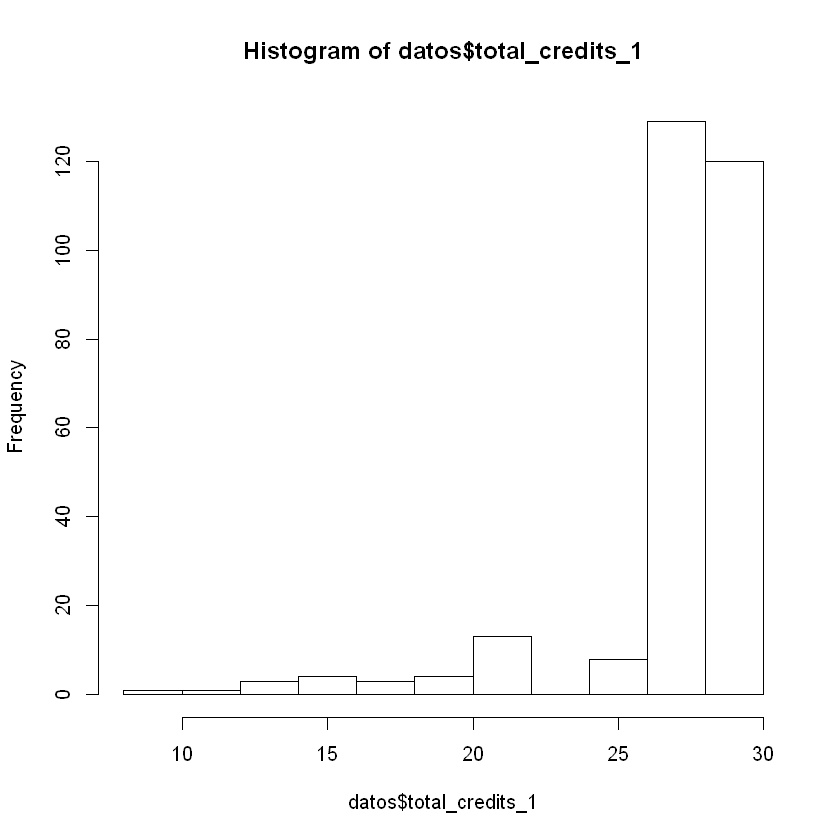

In [34]:
hist(datos$total_credits_1)

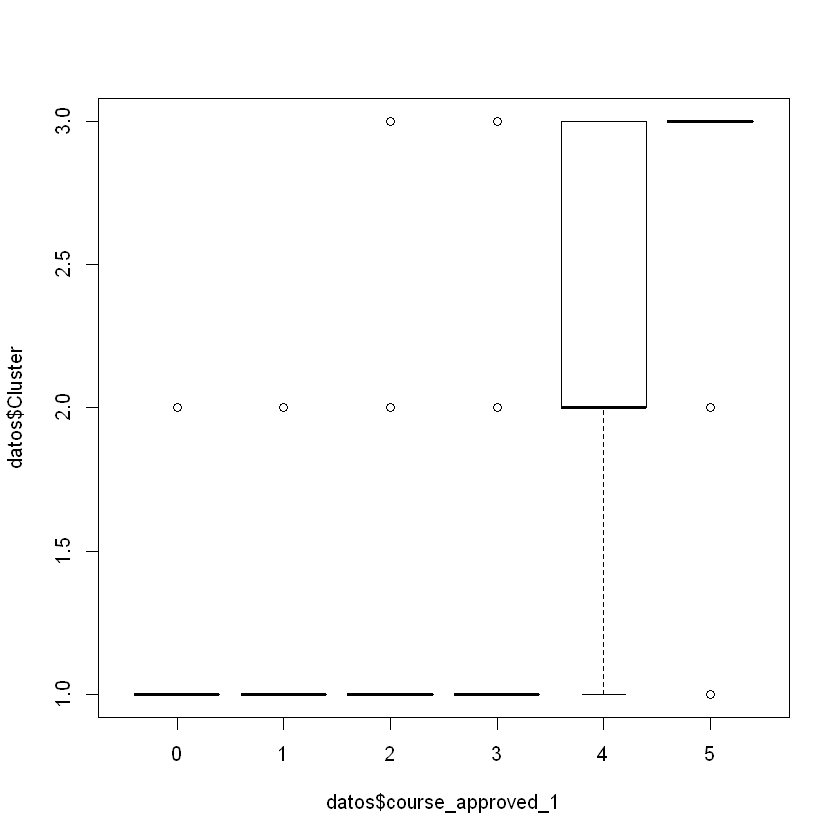

In [35]:

boxplot(datos$Cluster ~ datos$course_approved_1)

In [36]:
install.packages("corrplot")
library("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'




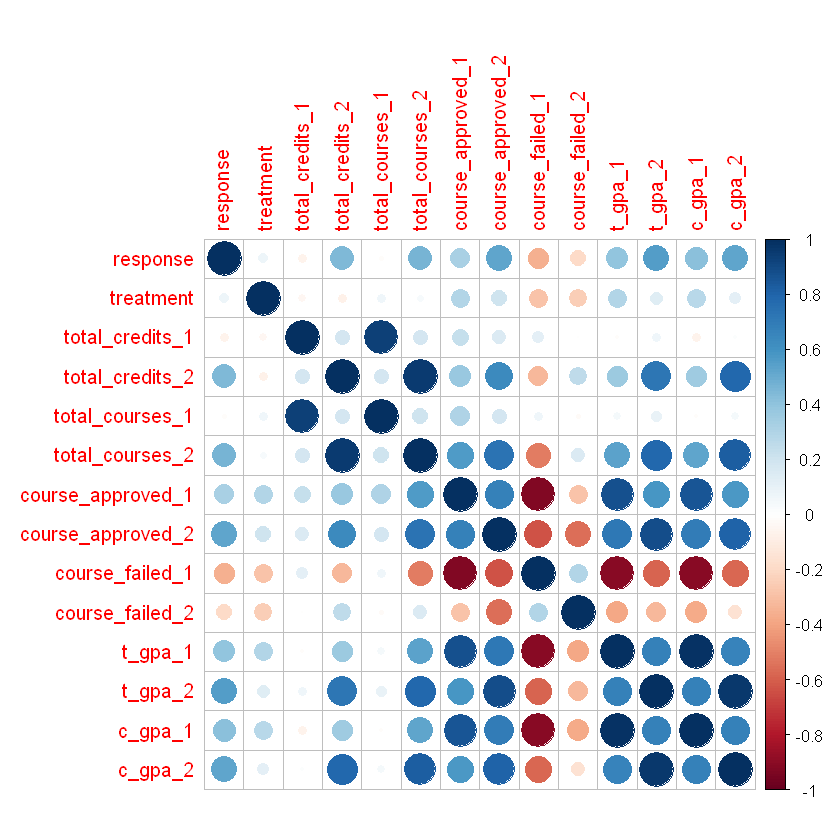

In [38]:
#definición de variables
response<-datos[,18]
treatment <- datos[,3]
confounders <- datos[,4:15]



dataT <- cbind(response,treatment,confounders)
corDatos <- cor(dataT)
corrplot(corDatos)


In [39]:
#análisis de independencia respuesta vs tratamiento
tab <- table(response, treatment)
print(tab)
chisq.test(cbind(as.factor(response),as.factor(treatment)))

        treatment
response   0   1
       0  39  31
       1 101 115


Warning message in chisq.test(cbind(as.factor(response), as.factor(treatment))):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  cbind(as.factor(response), as.factor(treatment))
X-squared = 38.973, df = 285, p-value = 1


In [57]:
#3. Ajuste de regresión logística para comparar resultados de bartc

y= as.factor(response)
z = as.factor(treatment)
summary(confounders)
x1 = confounders[,1]
x2 = confounders[,3]
x3 = confounders[,5]
x4 = confounders[,7]
x5 = confounders[,9]
res2 <- glm(y ~ z  +x5+x3+x4+x1,family=binomial(link="probit"))
summary(res2)

 total_credits_1 total_credits_2 total_courses_1 total_courses_2
 Min.   : 9.0    Min.   : 0.00   Min.   :2.000   Min.   :0.000  
 1st Qu.:28.0    1st Qu.:24.00   1st Qu.:5.000   1st Qu.:5.000  
 Median :28.0    Median :31.00   Median :5.000   Median :6.000  
 Mean   :27.4    Mean   :26.21   Mean   :4.825   Mean   :5.434  
 3rd Qu.:29.0    3rd Qu.:31.00   3rd Qu.:5.000   3rd Qu.:7.000  
 Max.   :30.0    Max.   :36.00   Max.   :6.000   Max.   :8.000  
 course_approved_1 course_approved_2 course_failed_1 course_failed_2
 Min.   :0.000     Min.   :0.000     Min.   :0.00    Min.   :0.000  
 1st Qu.:2.000     1st Qu.:2.000     1st Qu.:0.00    1st Qu.:0.000  
 Median :3.000     Median :4.000     Median :1.00    Median :1.000  
 Mean   :3.395     Mean   :3.846     Mean   :1.43    Mean   :1.587  
 3rd Qu.:5.000     3rd Qu.:6.000     3rd Qu.:3.00    3rd Qu.:3.000  
 Max.   :5.000     Max.   :7.000     Max.   :5.00    Max.   :7.000  
    t_gpa_1         t_gpa_2         c_gpa_1         c_gpa_2   


Call:
glm(formula = y ~ z + x5 + x3 + x4 + x1, family = binomial(link = "probit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2973   0.1233   0.5233   0.7245   1.6768  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.6015     1.3344  -1.950 0.051219 .  
z1           -0.1473     0.1894  -0.778 0.436757    
x5            0.8574     0.2418   3.546 0.000392 ***
x3            0.5818     0.5308   1.096 0.273032    
x4            0.7620     0.5438   1.401 0.161167    
x1           -0.1210     0.0890  -1.360 0.173920    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 318.32  on 285  degrees of freedom
Residual deviance: 267.19  on 280  degrees of freedom
AIC: 279.19

Number of Fisher Scoring iterations: 5


In [58]:
# 4. Ajuste de modelo bayesiano de arboles aditivos con causalidad

install.packages("bartCause")



  There is a binary version available but the source version is later:
          binary source needs_compilation
bartCause  1.0-4  1.0-6             FALSE



installing the source package 'bartCause'




In [59]:
library(bartCause)

In [60]:

confounders <-cbind(x1,x3,x4,x5)

In [61]:

res <- bartc(response, treatment,confounders,method.rsp="bart",n.samples = 100L, n.burn = 15L, n.chains = 2L,verbose=TRUE)

fitting treatment model via method 'bart'
fitting response model via method 'bart'


In [62]:
summary(res)

Call: bartc(response = response, treatment = treatment, confounders = confounders, 
            method.rsp = "bart", verbose = TRUE, n.samples = 100L, n.burn = 15L, 
            n.chains = 2L)

Causal inference model fit by:
  model.rsp: bart
  model.trt: bart

Treatment effect (population average):
    estimate      sd ci.lower ci.upper
ate -0.07626 0.09698  -0.2663   0.1138
Estimates fit from 286 total observations
95% credible interval calculated by: normal approximation
  population TE approximated by: posterior predictive distribution
Result based on 100 posterior samples times 2 chains

In [63]:
fitted(res)

[1] -0.07496503

In [68]:
length(extract(res))

[1] 200

In [69]:
summary(extract(res))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.328671 -0.143357 -0.069930 -0.074965 -0.003497  0.129371 

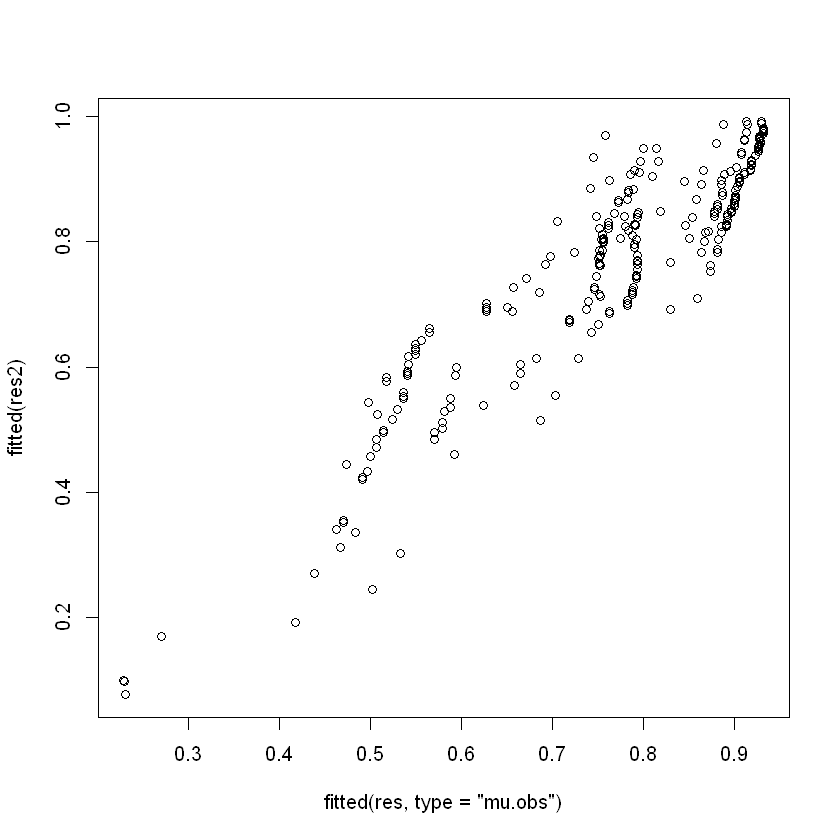

In [70]:
plot(fitted(res, type = "mu.obs"), fitted(res2))


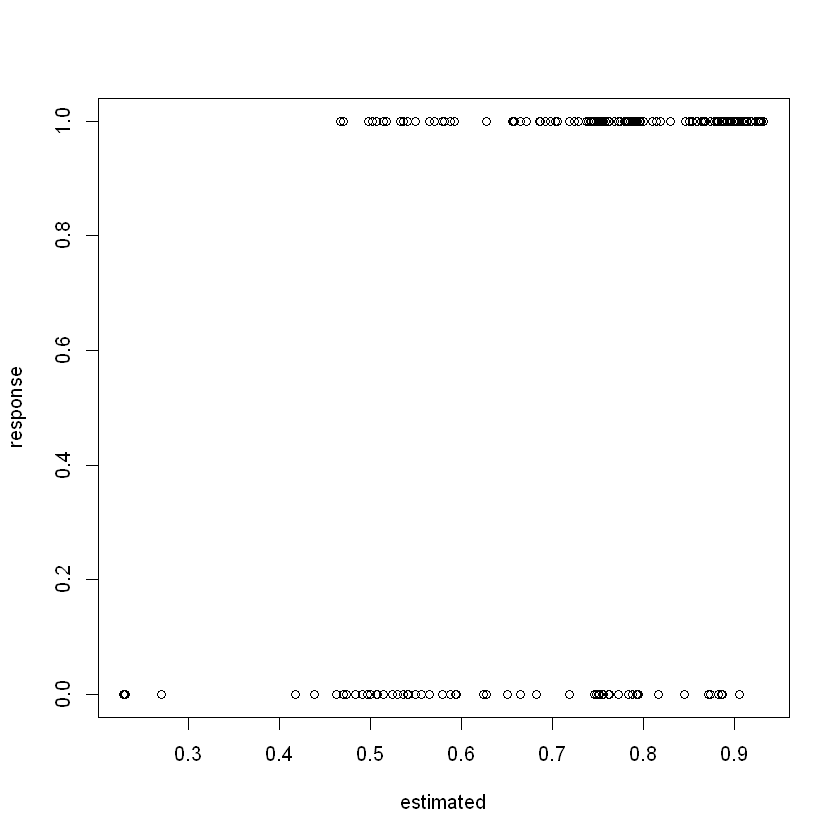

In [73]:
estimated<- fitted(res, type = "mu.obs")
plot(estimated, response)

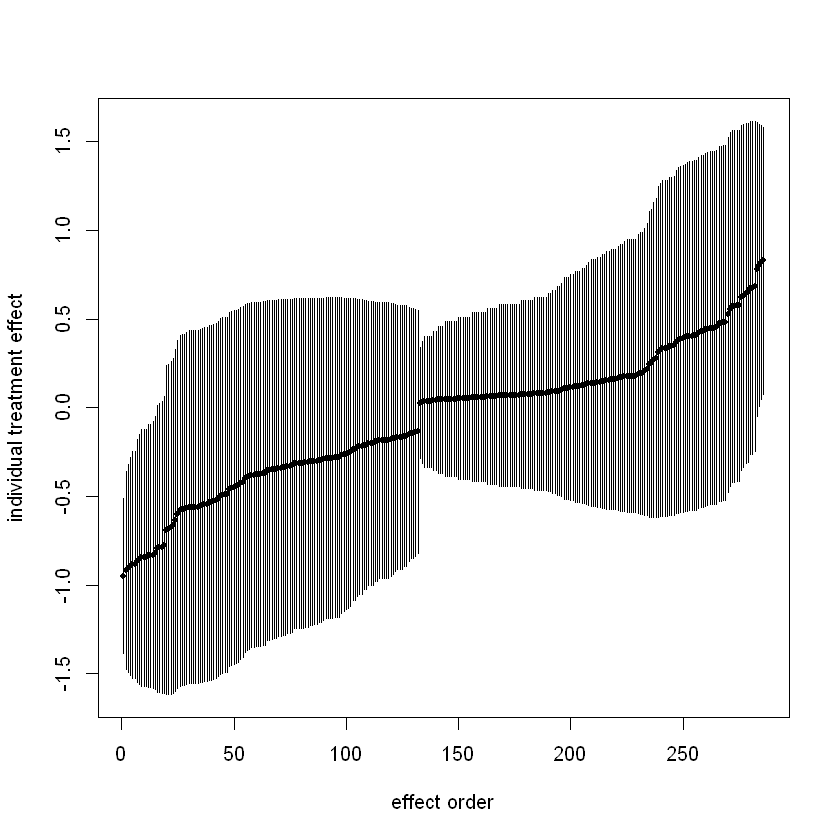

In [74]:
ites<- extract(res, type = "ite")
#ites <- ites[,z[]==]
ite.m  <- apply(ites, 2, mean)
ite.sd <- apply(ites, 2, sd)
ite.lb <- ite.m - 2 * ite.sd
ite.ub <- ite.m + 2 * ite.sd

ite.o <- order(ite.m)

plot(NULL, type = "n",
     xlim = c(1, length(ite.m)), ylim = range(ite.lb, ite.ub),
     xlab = "effect order", ylab = "individual treatment effect")
lines(rbind(seq_along(ite.m), seq_along(ite.m), NA),
      rbind(ite.lb[ite.o], ite.ub[ite.o], NA), lwd = 0.5)
points(seq_along(ite.m), ite.m[ite.o], pch = 20)

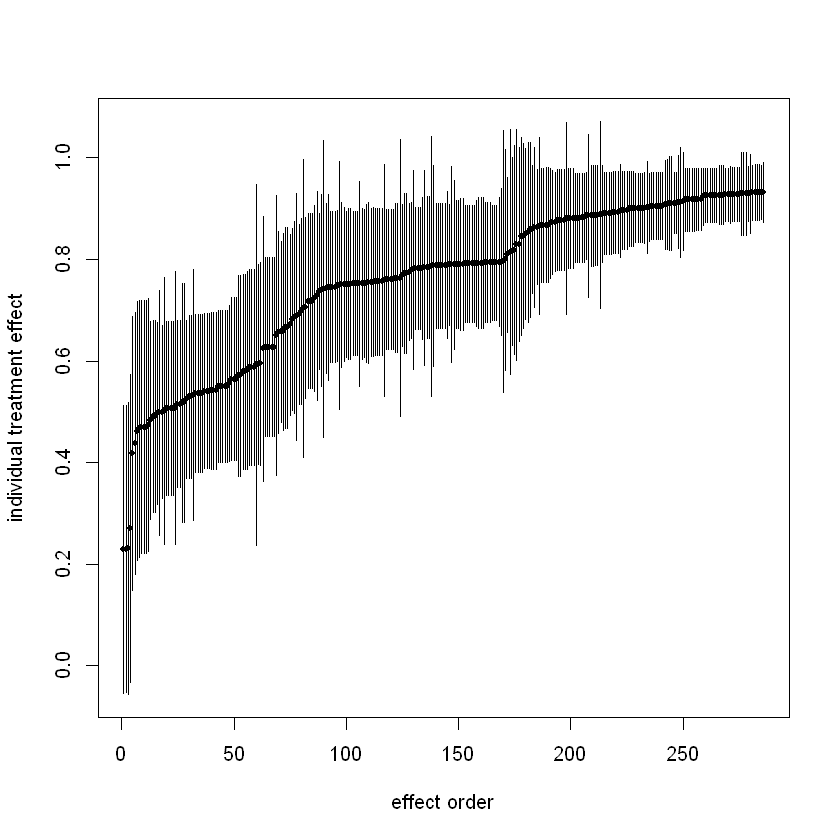

In [75]:
ites<- extract(res, type = "mu.obs")
#ites <- ites[,z[]==0]
ite.m  <- apply(ites, 2, mean)
ite.sd <- apply(ites, 2, sd)
ite.lb <- ite.m - 2 * ite.sd
ite.ub <- ite.m + 2 * ite.sd

ite.o <- order(ite.m)

plot(NULL, type = "n",
     xlim = c(1, length(ite.m)), ylim = range(ite.lb, ite.ub),
     xlab = "effect order", ylab = "individual treatment effect")
lines(rbind(seq_along(ite.m), seq_along(ite.m), NA),
      rbind(ite.lb[ite.o], ite.ub[ite.o], NA), lwd = 0.5)
points(seq_along(ite.m), ite.m[ite.o], pch = 20)

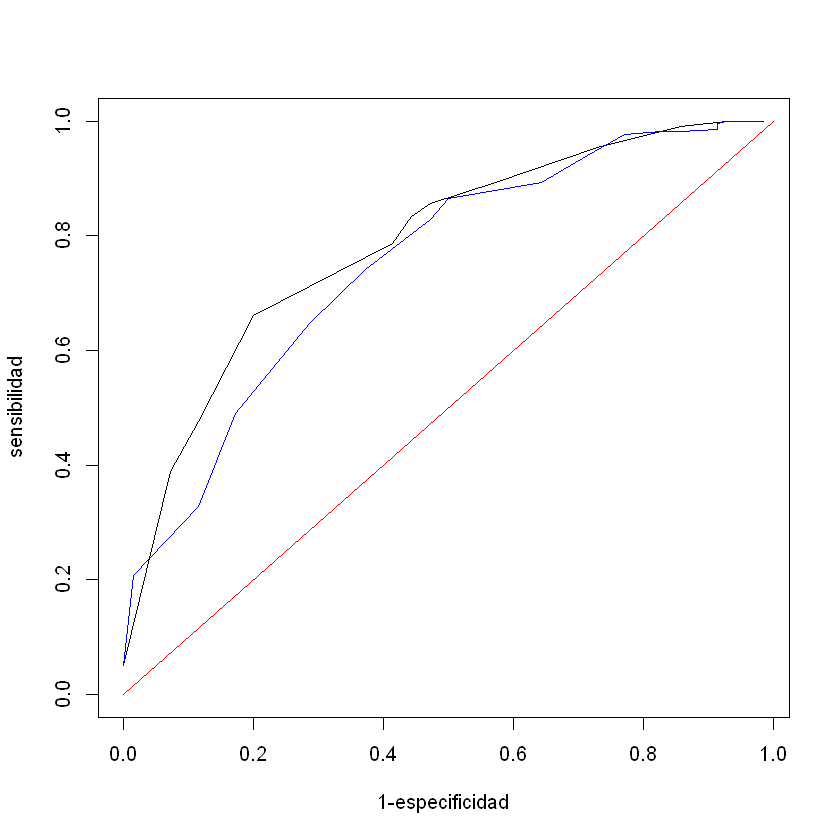

In [76]:
prob1 = fitted(res, type="mu.obs")
prob2 = fitted(res2)
p1=matrix(0,nrow=50,ncol=3)
p2=matrix(0,nrow=50,ncol=3)
i=1
for(p in seq(min(prob1),max(prob1),.05)){
    t1=table(prob1>p,as.factor(dataT$response))
    p1[i,]=c(p,(t1[2,2])/sum(t1[,2]),(t1[1,1])/sum(t1[,1]))
    i=i+1
}

j=1
for(p in seq(min(prob2),max(prob2),.05)){
    t2=table(prob2>p,as.factor(dataT$response))
    p2[j,]=c(p,(t2[2,2])/sum(t2[,2]),(t2[1,1])/sum(t2[,1]))
    j=j+1
}

plot(1-p1[1:i-1,3],p1[1:i-1,2],type="l",xlab="1-especificidad",ylab="sensibilidad",ylim=c(0,1))
lines(1-p2[1:j-1,3],p2[1:j-1,2],col="blue")
lines(c(0,1),c(0,1),col="red")

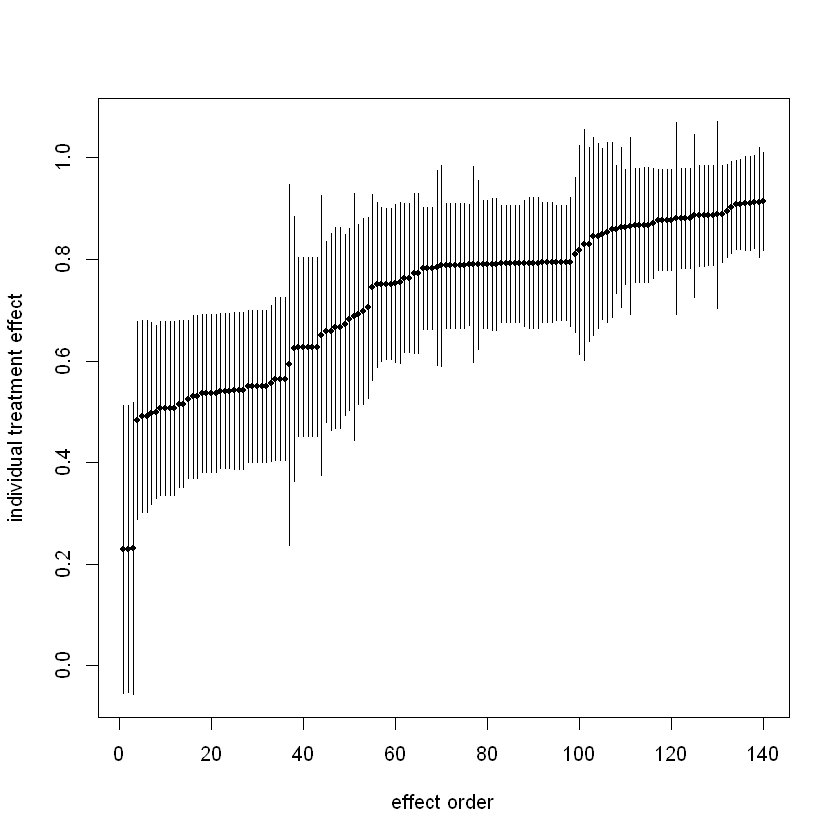

In [77]:
ites<- extract(res, type = "mu.obs")
ites <- ites[,z[]==0]
ite.m  <- apply(ites, 2, mean)
ite.sd <- apply(ites, 2, sd)
ite.lb <- ite.m - 2 * ite.sd
ite.ub <- ite.m + 2 * ite.sd

ite.o <- order(ite.m)

plot(NULL, type = "n",
     xlim = c(1, length(ite.m)), ylim = range(ite.lb, ite.ub),
     xlab = "effect order", ylab = "individual treatment effect")
lines(rbind(seq_along(ite.m), seq_along(ite.m), NA),
      rbind(ite.lb[ite.o], ite.ub[ite.o], NA), lwd = 0.5)
points(seq_along(ite.m), ite.m[ite.o], pch = 20)